In [133]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, SimpleRNN
from sklearn.model_selection import train_test_split

In [134]:
s1 = pd.read_csv("NFLX.csv")
s1.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [135]:
s1.shape

(1009, 7)

In [136]:
s1.isna().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [137]:
s1.isnull().sum()

,0
Date,0
Open,0
High,0
Low,0
Close,0
Adj Close,0
Volume,0


In [138]:
s1.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1009.000000,1009.000000,1009.000000,1009.000000,1009.000000,1.009000e+03
mean,419.059673,425.320703,412.374044,419.000733,419.000733,7.570685e+06
std,108.537532,109.262960,107.555867,108.289999,108.289999,5.465535e+06
min,233.919998,250.649994,231.229996,233.880005,233.880005,1.144000e+06
25%,331.489990,336.299988,326.000000,331.619995,331.619995,4.091900e+06
50%,377.769989,383.010010,370.880005,378.670013,378.670013,5.934500e+06
75%,509.130005,515.630005,502.529999,509.079987,509.079987,9.322400e+06
max,692.349976,700.989990,686.090027,691.690002,691.690002,5.890430e+07


In [139]:
s1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [140]:
s1['Date'] = pd.to_datetime(s1['Date'])

In [141]:
s1.corr()

,Date,Open,High,Low,Close,Adj Close,Volume
Date,1.000000,0.840554,0.841665,0.840878,0.841384,0.841384,-0.427661
Open,0.840554,1.000000,0.998605,0.998508,0.996812,0.996812,-0.415838
High,0.841665,0.998605,1.000000,0.998203,0.998551,0.998551,-0.400699
Low,0.840878,0.998508,0.998203,1.000000,0.998544,0.998544,-0.432116
Close,0.841384,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Adj Close,0.841384,0.996812,0.998551,0.998544,1.000000,1.000000,-0.413362
Volume,-0.427661,-0.415838,-0.400699,-0.432116,-0.413362,-0.413362,1.000000


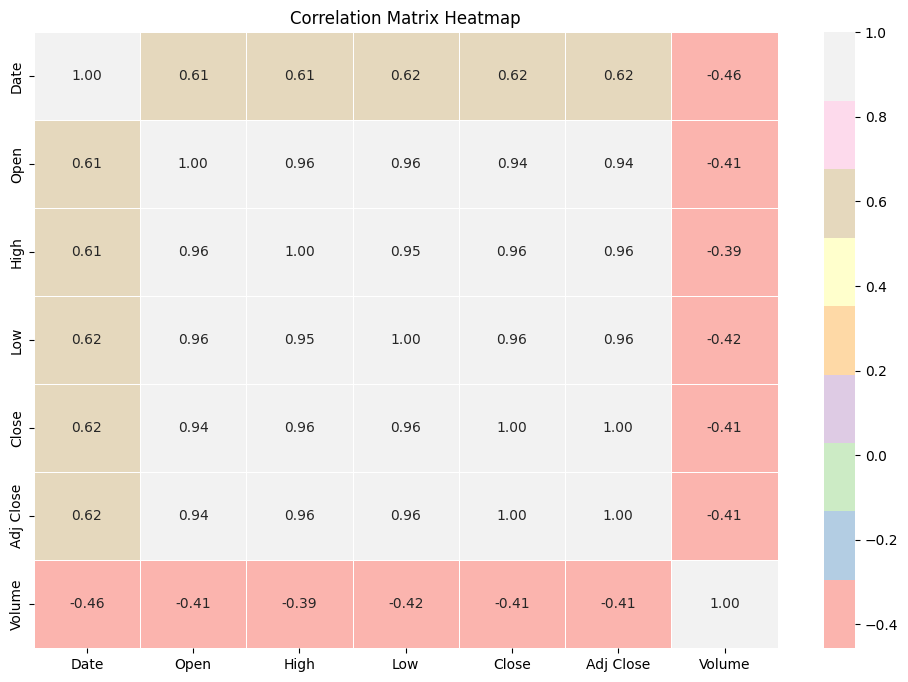

In [142]:
plt.figure(figsize=(12, 8))
sns.heatmap(s1.corr(method='kendall'), annot=True, cmap='Pastel1', fmt='.2f', linewidths=0.7)
plt.title('Correlation Matrix Heatmap')
plt.show()

In [143]:
s1['Date'].max()

Timestamp('2022-02-04 00:00:00')

In [144]:
s1['Date'].min()

Timestamp('2018-02-05 00:00:00')

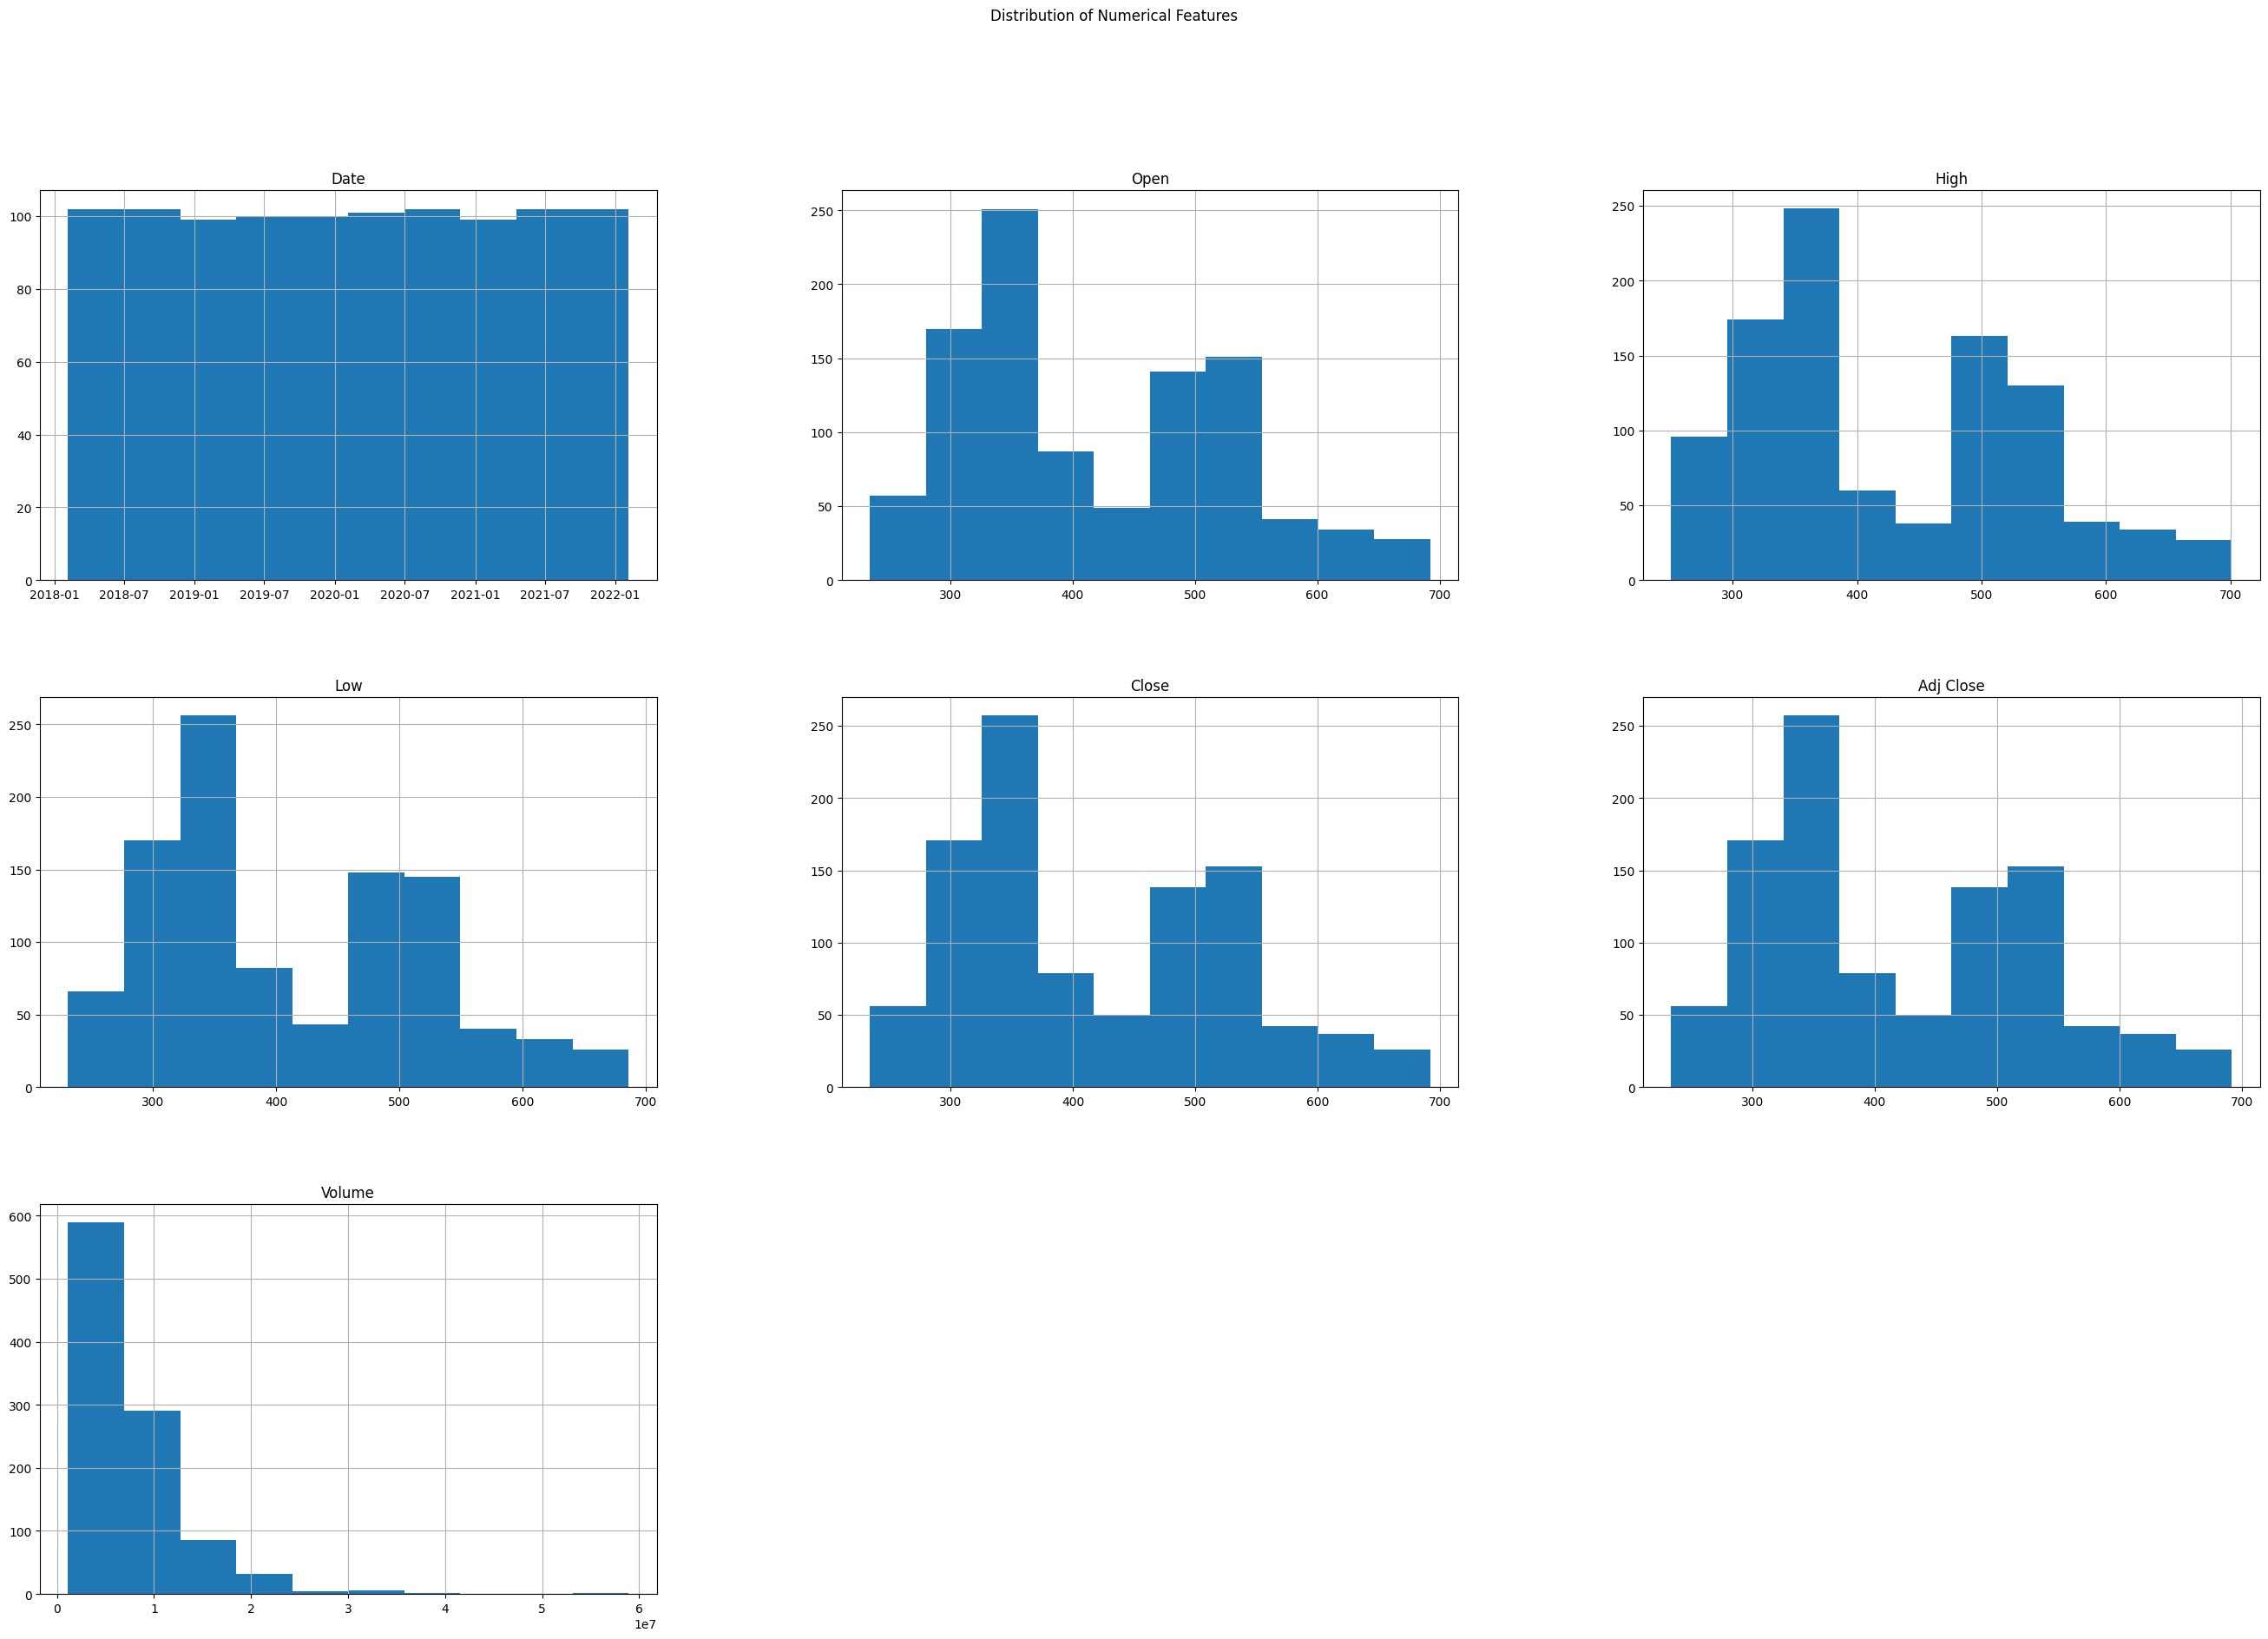

In [145]:
s1.hist(figsize=(33,21))
plt.suptitle('Distribution of Numerical Features')
plt.show()

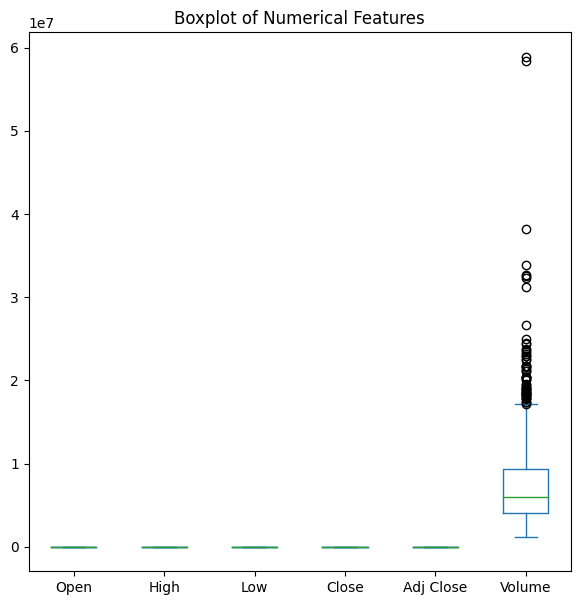

In [146]:
s1.plot.box(figsize=(7, 7))
plt.title('Boxplot of Numerical Features')
plt.show()

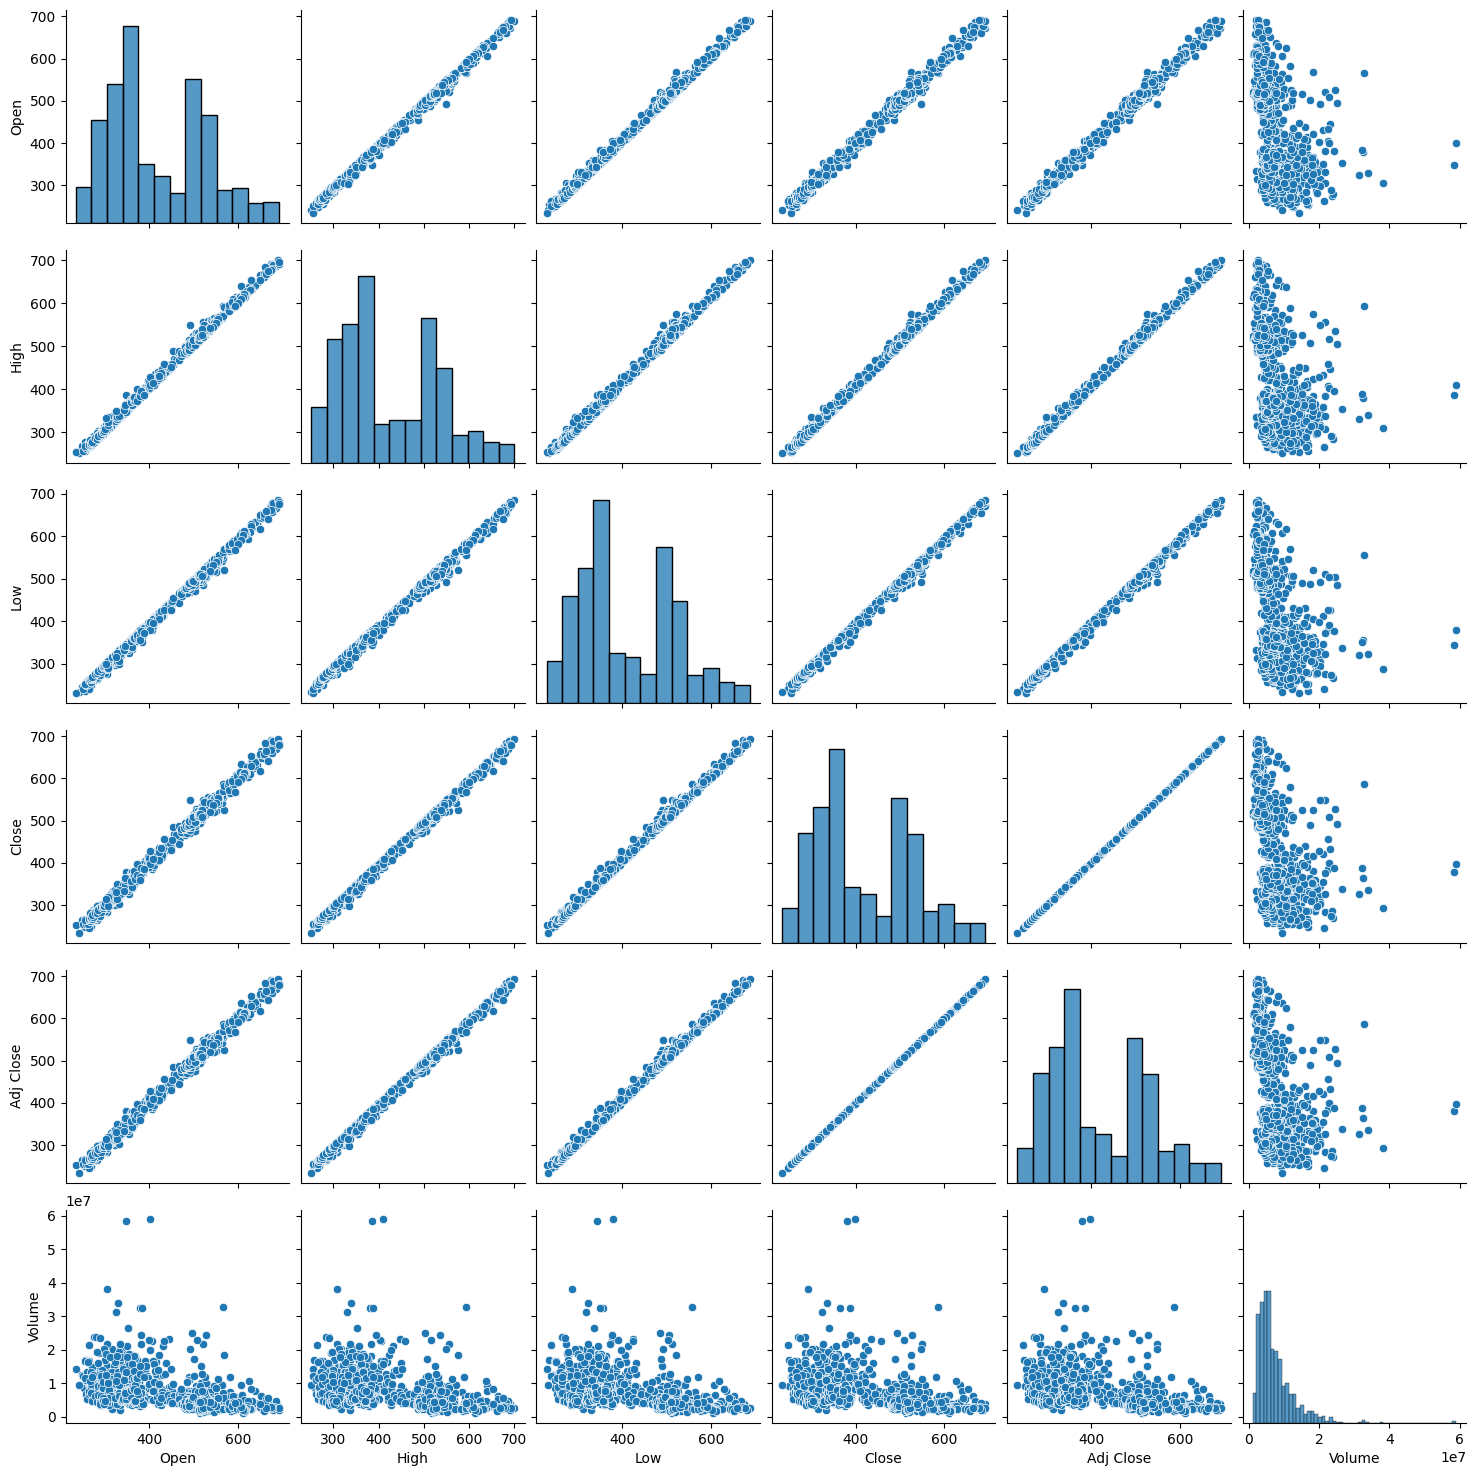

In [147]:
sns.pairplot(s1)
plt.show()

In [148]:
dt = s1['Close'].values
dt

array([254.259995, 265.720001, 264.559998, ..., 429.480011, 405.600006,
       410.170013])

In [149]:
dt = dt.reshape(-1, 1)
dt

array([[254.259995],
       [265.720001],
       [264.559998],
       ...,
       [429.480011],
       [405.600006],
       [410.170013]])

In [150]:
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(dt)
scaled_data, scaled_data.shape , scaler

(array([[0.04451626],
        [0.06954849],
        [0.06701469],
        ...,
        [0.4272515 ],
        [0.37509011],
        [0.38507243]]),
 (1009, 1),
 MinMaxScaler())

In [151]:
train_size = int(len(scaled_data) * 0.8)
train_size

807

In [152]:
test_size = int(len(scaled_data) * 0.2)
test_size

201

In [153]:
train_data = scaled_data[:train_size]
train_data.shape

(807, 1)

In [154]:
test_data = scaled_data[:test_size]
test_data.shape

(201, 1)

In [155]:
model = Sequential([
    SimpleRNN(50, activation='tanh', input_shape=(None, 1)),
    Dense(1)
])

/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [156]:
model.compile(optimizer='adam', loss='mse')

In [157]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ simple_rnn_4 (SimpleRNN)             │ (None, 50)                  │           2,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,651 (10.36 KB)

 Trainable params: 2,651 (10.36 KB)

 Non-trainable params: 0 (0.00 B)

In [158]:
X_train = np.reshape(train_data, (len(train_data), 1, 1))
X_train.shape

(807, 1, 1)

In [159]:
X_test = np.reshape(test_data, (len(test_data), 1, 1))
X_test.shape

(201, 1, 1)

In [160]:
y_train = train_data
y_test = test_data
y_train.shape, y_test.shape

((807, 1), (201, 1))

In [161]:
history = model.fit(X_train, y_train, epochs=21, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0458 - val_loss: 0.0077
Epoch 2/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0062 - val_loss: 0.0022
Epoch 3/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0033 - val_loss: 0.0015
Epoch 4/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0015 - val_loss: 6.0980e-04
Epoch 5/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 6.2944e-04 - val_loss: 1.6589e-04
Epoch 6/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.1384e-04 - val_loss: 4.7707e-05
Epoch 7/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 5.7263e-05 - val_loss: 8.3785e-06
Epoch 8/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - loss: 1.1811e-05 - val_loss: 1.5790e-06
Epoch 9/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 2.7736e-06 - val_loss: 4.7889e-07
Epoch 10/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 9.9508e-07 - val_loss: 6.2244e-07
Epoch 11/21
26/26 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 8.7358e-07 - val_loss: 5.3850e-07
Epoch 12/21
2

In [162]:
predicted_prices = model.predict(X_test)
predicted_prices = scaler.inverse_transform(predicted_prices)
predicted_prices

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


array([[253.44943],
       [265.05307],
       [263.87863],
       [249.23685],
       [248.59888],
       [257.1859 ],
       [257.50992],
       [265.33658],
       [279.7814 ],
       [278.01025],
       [278.04062],
       [280.56067],
       [277.62567],
       [285.50906],
       [293.83536],
       [290.24414],
       [291.02313],
       [290.02158],
       [300.80374],
       [314.90527],
       [325.2291 ],
       [321.12863],
       [316.9261 ],
       [331.5089 ],
       [321.27002],
       [315.79446],
       [321.52252],
       [321.0579 ],
       [318.39102],
       [313.36926],
       [317.43124],
       [316.40067],
       [306.51636],
       [300.6925 ],
       [320.31042],
       [300.4397 ],
       [285.34717],
       [295.03903],
       [279.80164],
       [283.2222 ],
       [288.55457],
       [293.64316],
       [288.46356],
       [289.55618],
       [297.7901 ],
       [303.45297],
       [309.09406],
       [311.5198 ],
       [307.60812],
       [336.1716 ],


In [163]:
real_prices = scaler.inverse_transform(y_test.reshape(-1, 1))
real_prices

array([[254.259995],
       [265.720001],
       [264.559998],
       [250.100006],
       [249.470001],
       [257.950012],
       [258.269989],
       [266.      ],
       [280.269989],
       [278.519989],
       [278.549988],
       [281.040009],
       [278.140015],
       [285.929993],
       [294.160004],
       [290.609985],
       [291.380005],
       [290.390015],
       [301.049988],
       [315.      ],
       [325.220001],
       [321.160004],
       [317.      ],
       [331.440002],
       [321.299988],
       [315.880005],
       [321.549988],
       [321.089996],
       [318.450012],
       [313.480011],
       [317.5     ],
       [316.480011],
       [306.700012],
       [300.940002],
       [320.350006],
       [300.690002],
       [285.769989],
       [295.350006],
       [280.290009],
       [283.670013],
       [288.940002],
       [293.970001],
       [288.850006],
       [289.929993],
       [298.070007],
       [303.670013],
       [309.25    ],
       [311.6

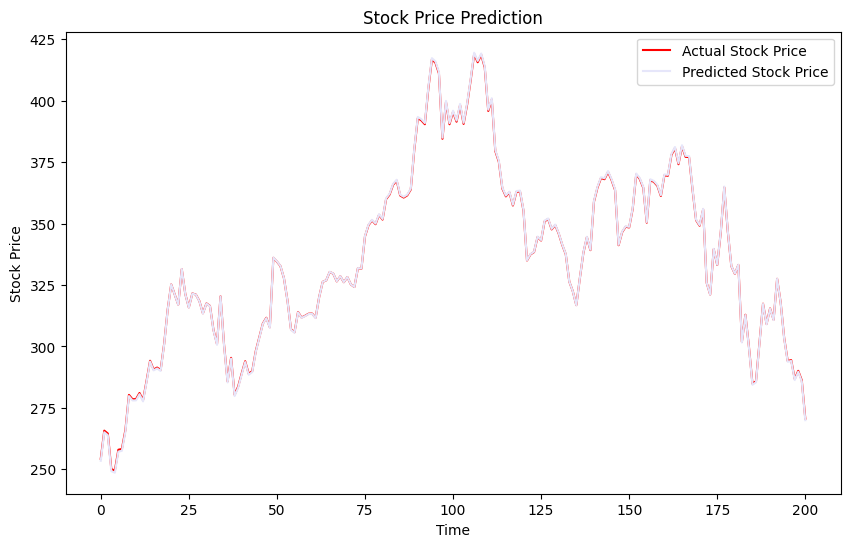

In [164]:
plt.figure(figsize=(10, 6))
plt.plot(real_prices, color='red', label='Actual Stock Price')
plt.plot(predicted_prices, color='lavender', label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()

In [165]:
model.save('stock_price_prediction_model.h5')